In [50]:
import pandas as pd
df = pd.read_csv("data.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [51]:
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

In [52]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40
...,...,...,...,...,...
195,196,1,35,120,79
196,197,1,45,126,28
197,198,0,32,126,74
198,199,0,32,137,18


In [53]:
#features = df[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']].values

# K-Means from scratch

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
class KMeans:
    def __init__(self, k=3, max_iters=100):
        self.k = k
        self.max_iters = max_iters
        self.centroids = None

    def initialize_centroids(self, data):
        indices = np.random.choice(len(data), self.k, replace=False)
        return data.iloc[indices]

    def assign_clusters(self, data, centroids):
        distances = np.linalg.norm(data.values - centroids.values[:, np.newaxis], axis=2)
        return np.argmin(distances, axis=0)

    def update_centroids(self, data, clusters):
        new_centroids = np.array([data[clusters == i].mean(axis=0) for i in range(self.k)])
        return pd.DataFrame(new_centroids, columns=data.columns)

    def fit(self, data):
        self.centroids = self.initialize_centroids(data.drop(columns=['CustomerID']))

        for _ in range(self.max_iters):
            clusters = self.assign_clusters(data.drop(columns=['CustomerID']), self.centroids)
            new_centroids = self.update_centroids(data.drop(columns=['CustomerID']), clusters)

            # Check for convergence
            if np.array_equal(self.centroids.values, new_centroids.values):
                break

            self.centroids = new_centroids

        return clusters

    def silhouette_score(self, data):
        clusters = self.assign_clusters(data.drop(columns=['CustomerID']), self.centroids)
        return silhouette_score(data.drop(columns=['CustomerID']), clusters)

    def plot_clusters(self, data):
        plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c='blue', label='Data Points')
        plt.scatter(self.centroids['Annual Income (k$)'], self.centroids['Spending Score (1-100)'],
                    c='red', marker='X', s=200, label='Centroids')
        plt.xlabel('Annual Income (k$)')
        plt.ylabel('Spending Score (1-100)')
        plt.title('K-Means Clustering')
        plt.legend()
        plt.show()

In [65]:
Kmeans = KMeans(k=3)
clusters = Kmeans.fit(df)

In [66]:
df['Cluster'] = clusters

In [67]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,0,19,15,39,0
1,2,0,21,15,81,0
2,3,1,20,16,6,0
3,4,1,23,16,77,0
4,5,1,31,17,40,0
...,...,...,...,...,...,...
195,196,1,35,120,79,2
196,197,1,45,126,28,1
197,198,0,32,126,74,2
198,199,0,32,137,18,1


In [68]:
print("Final Centroids:")
print(Kmeans.centroids)
print("\nDataFrame with Assigned Clusters:")
print(df)

Final Centroids:
     Gender        Age  Annual Income (k$)  Spending Score (1-100)   Cluster
0  0.593496  40.325203           44.154472               49.829268  0.658537
1  0.473684  40.394737           87.000000               18.631579  1.052632
2  0.538462  32.692308           86.538462               82.128205  2.000000

DataFrame with Assigned Clusters:
     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0             1       0   19                  15                      39   
1             2       0   21                  15                      81   
2             3       1   20                  16                       6   
3             4       1   23                  16                      77   
4             5       1   31                  17                      40   
..          ...     ...  ...                 ...                     ...   
195         196       1   35                 120                      79   
196         197       1   45    

Silhouette Score: 0.384099297090951


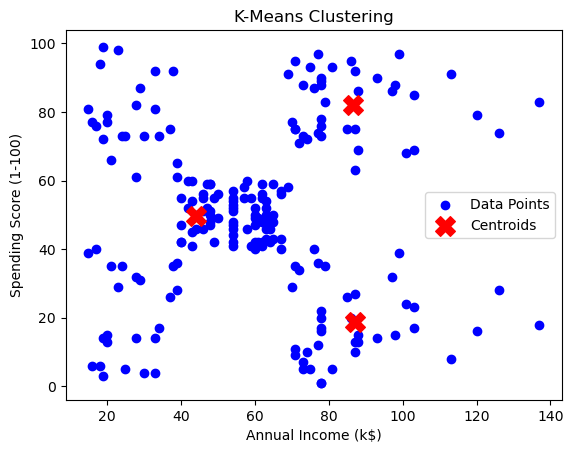

In [69]:
# Calculate and print the Silhouette Score
sil_score = Kmeans.silhouette_score(df)
print("Silhouette Score:", sil_score)

# Plot the clusters
Kmeans.plot_clusters(df)

# K-Means with sklearn

In [19]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

data = pd.read_csv("data.csv")

# Convert 'Gender' to numerical values (e.g., Male=0, Female=1)
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])

# Extract features for clustering
features = data[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Initialize and fit the KMeans model
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(features)
clus = data['Cluster'].values
# Print the final centroids and the DataFrame with assigned clusters
print("Final Centroids:")
print(kmeans.cluster_centers_)
print("\nDataFrame with Assigned Clusters:")
print(data)


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Final Centroids:
[[ 0.46153846 32.69230769 86.53846154 82.12820513]
 [ 0.40650407 40.32520325 44.15447154 49.82926829]
 [ 0.52631579 40.39473684 87.         18.63157895]]

DataFrame with Assigned Clusters:
     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0             1       1   19                  15                      39   
1             2       1   21                  15                      81   
2             3       0   20                  16                       6   
3             4       0   23                  16                      77   
4             5       0   31                  17                      40   
..          ...     ...  ...                 ...                     ...   
195         196       0   35                 120                      79   
196         197       0   45                 126                      28   
197         198       1   32                 126                      74   
198         199       1   32      

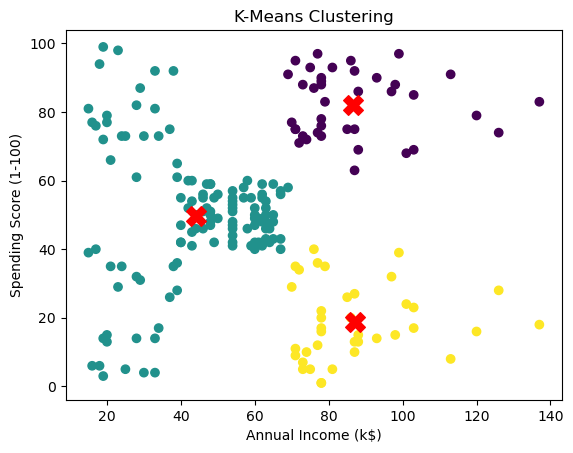

In [15]:

# Visualize the clusters
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c=data['Cluster'], cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 3], marker='X', s=200, c='red')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('K-Means Clustering')
plt.show()


# Inferences

In [22]:
print("Clusters of kmeans - scratch\n",clusters)
print("Clusters of kmeans - sklearn\n", clus)




Clusters of kmeans - scratch
 [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]
Clusters of kmeans - sklearn
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0]


### almost similar clustering has taken place in both the methods

In [30]:
print("Final Centroids kmeans - scratch:")
print(means.centroids)
print("Final Centroids kmeans - sklearn:")
print(kmeans.cluster_centers_)


Final Centroids kmeans - scratch:
     Gender        Age  Annual Income (k$)  Spending Score (1-100)  Cluster
0  0.593496  40.325203           44.154472               49.829268      2.0
1  0.473684  40.394737           87.000000               18.631579      0.0
2  0.538462  32.692308           86.538462               82.128205      1.0
Final Centroids kmeans - sklearn:
[[ 0.46153846 32.69230769 86.53846154 82.12820513]
 [ 0.40650407 40.32520325 44.15447154 49.82926829]
 [ 0.52631579 40.39473684 87.         18.63157895]]


In [70]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(features, clusters)

print("Silhouette_score - kmean scratch:",sil_score)
print("Silhouette_score - kmean sklearn:",silhouette_avg)


Silhouette_score - kmean scratch: 0.384099297090951
Silhouette_score - kmean sklearn: 0.383798873822341


This suggests that both implementations are performing reasonably well in terms of cluster separation for given dataset. A Silhouette Score around 0.38 indicates moderate separation between clusters.